# Day Trading Notebook
<b>Authors: Jared Prior and Miguel Oyler-Castrillo</b>

In [1]:
import urllib3
from bs4 import BeautifulSoup
import bs4
import requests
import re
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

BUFFER_TIME = 5
def extract_source(url):
    agent = {"User-Agent":"Mozilla/5.0"}
    source=requests.get(url, headers=agent).text
    return source

In [2]:
def getData(source):
    soup=bs4.BeautifulSoup(source, 'lxml')
    stocks = soup.findAll('tr')
    ids = []
    names = []
    prices = []
    changes = []
    deltas = []
    for stock in stocks:
        td = stock.findAll('td')
        i = 0
        vals = []
        for d in td:
            txt = d.get_text()
            if txt == " " or txt == "" or txt == '' or txt == 'N/A':
                continue
            else:
                vals.append(txt)
        if vals == []:
            del vals
            continue
        else:
            ids.append(vals[0])
            names.append(vals[1])
            prices.append(vals[2])
            changes.append(vals[3])
            deltas.append(vals[4])
    dct_df = {"Identifier":ids,
              "Name":names,
              "Price":prices,
              "Change":changes,
              "Percent Change":deltas}
    df = pd.DataFrame(dct_df, columns = ["Identifier",
                                         "Name",
                                         "Price",
                                         "Change",
                                         "Percent Change"])
    return df

In [6]:
global STOCK_TREND_DICT
STOCK_TREND_DICT = {}
def exists(name):
    if name in STOCK_TREND_DICT:
        return True
    else:
        return False
def row_parser(row):
    company = row['Identifier']
    price = row['Price']
    if not exists(company):
        STOCK_TREND_DICT[company] = []
    STOCK_TREND_DICT[company].append(price)

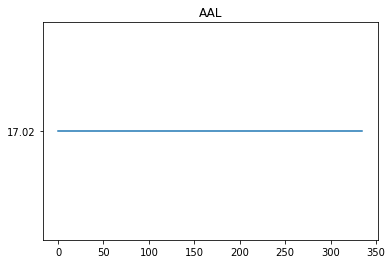

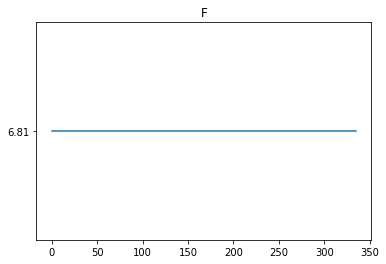

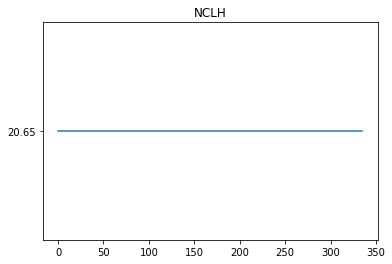

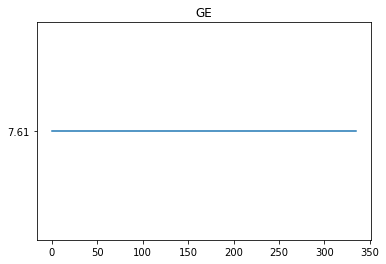

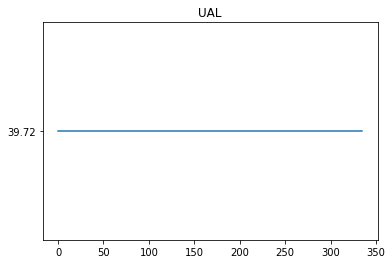

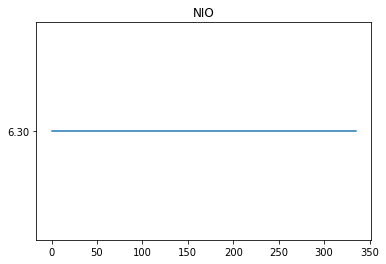

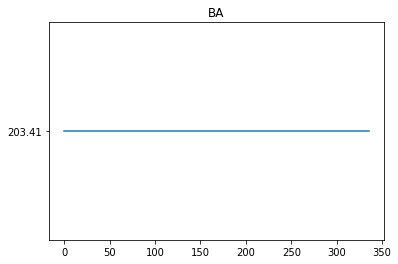

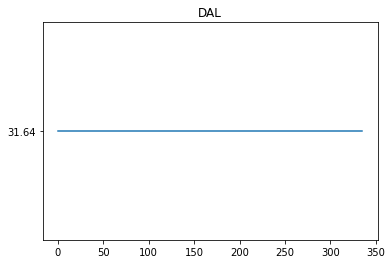

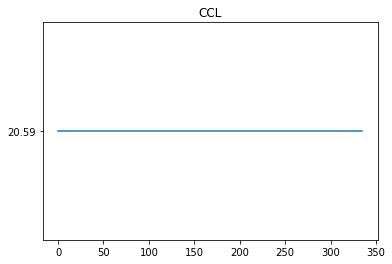

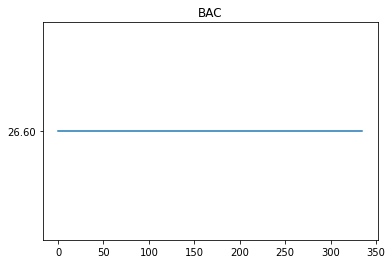

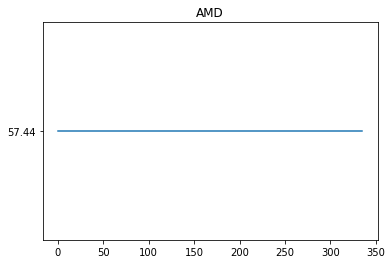

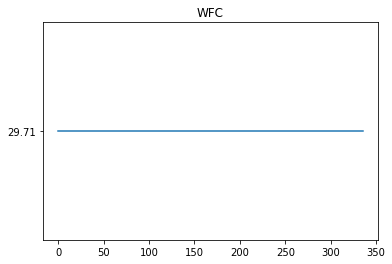

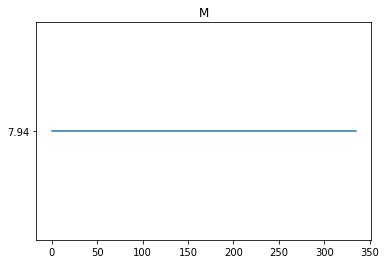

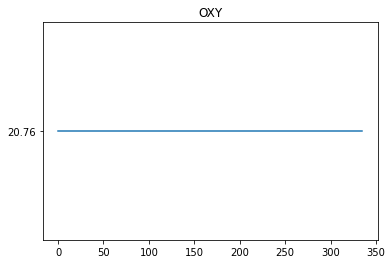

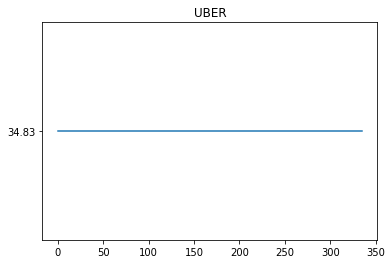

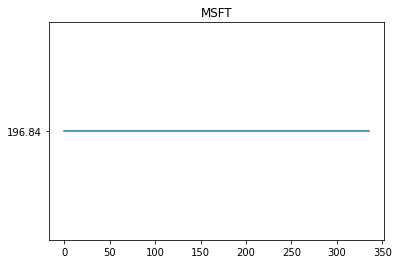

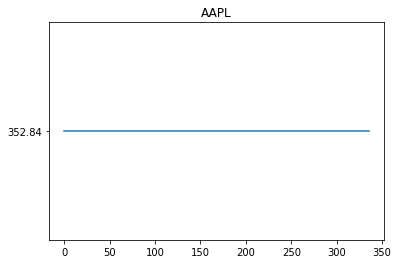

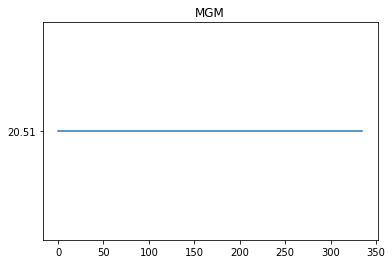

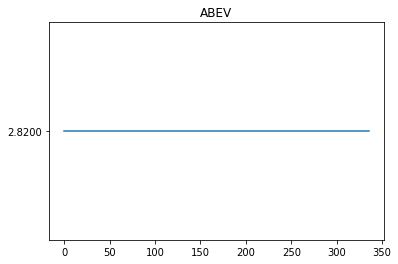

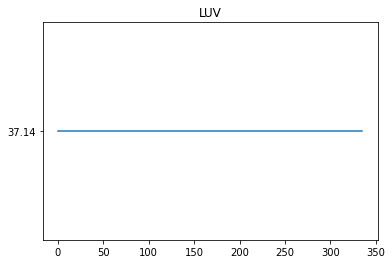

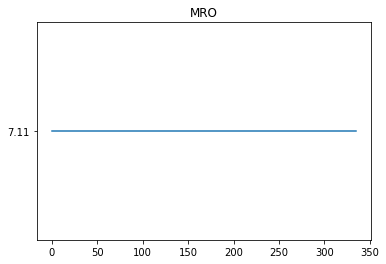

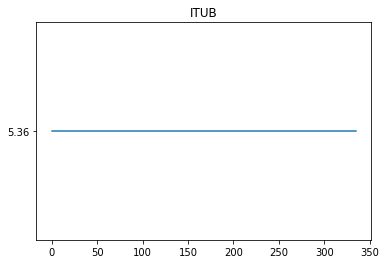

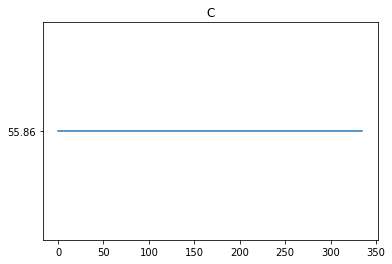

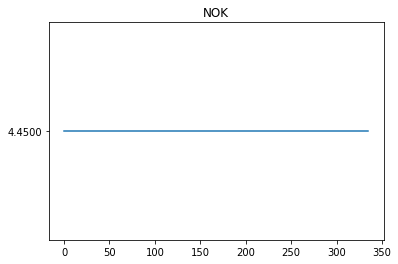

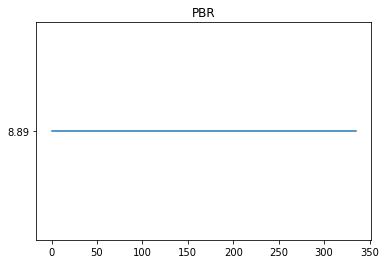

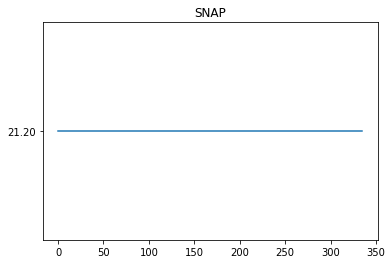

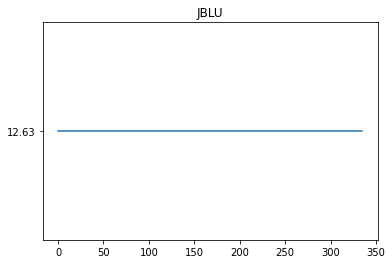

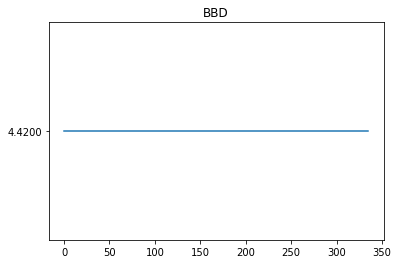

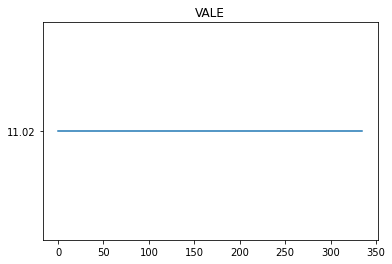

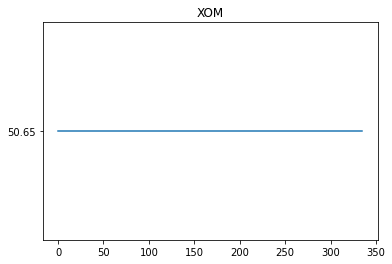

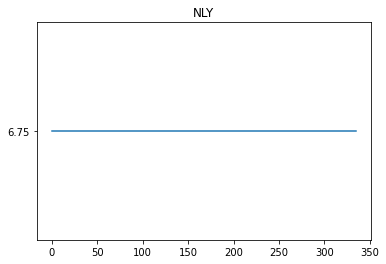

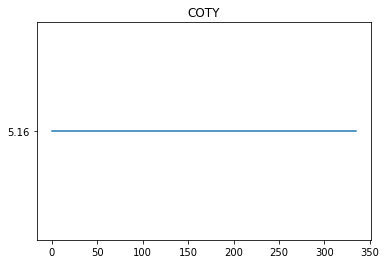

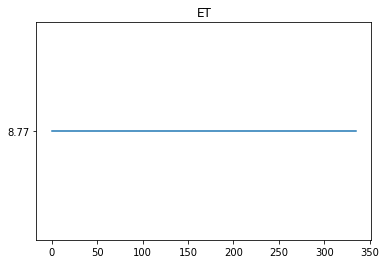

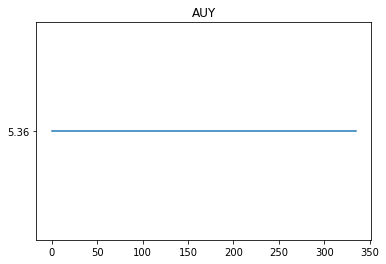

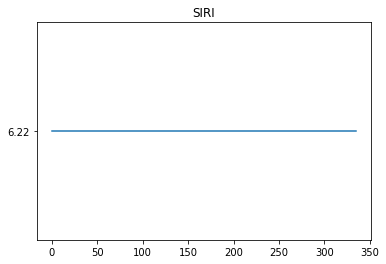

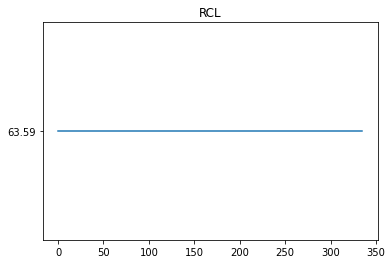

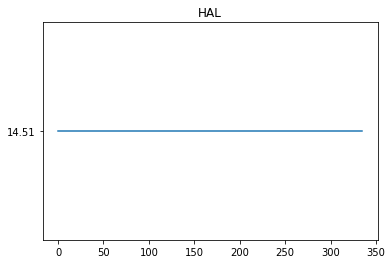

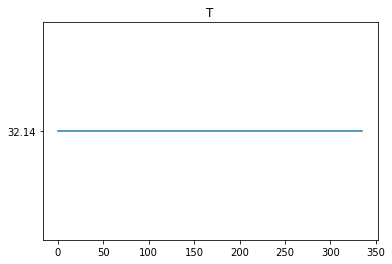

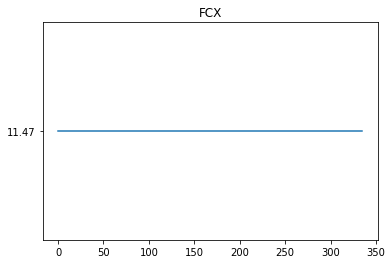

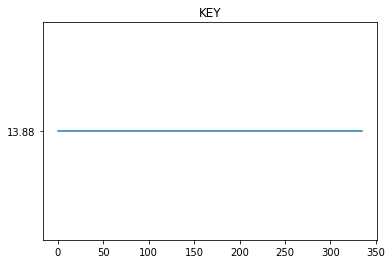

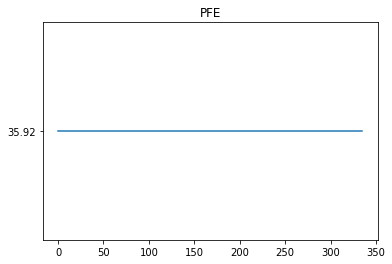

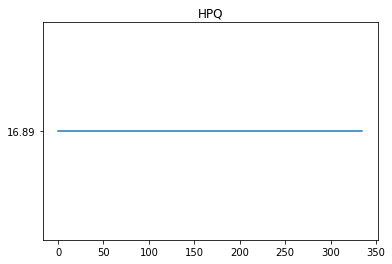

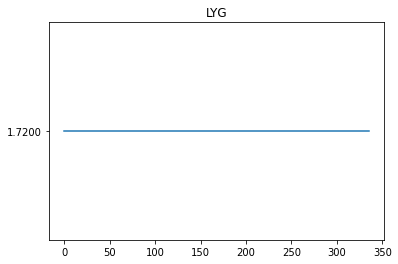

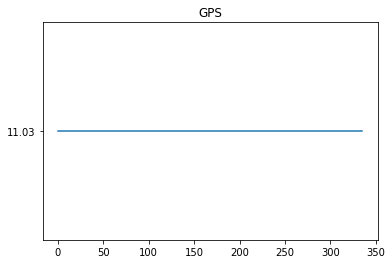

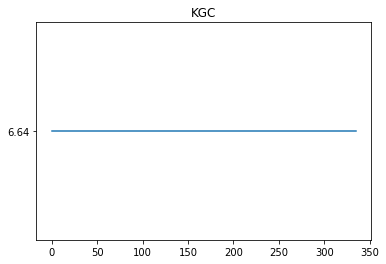

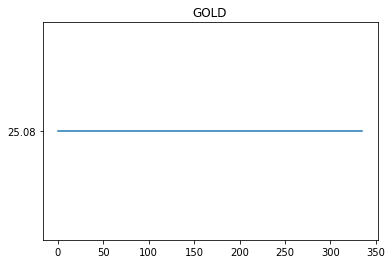

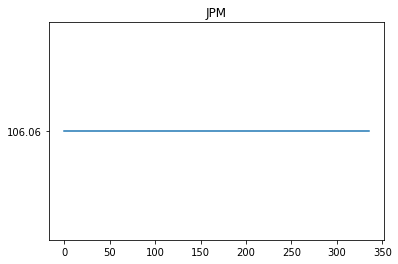

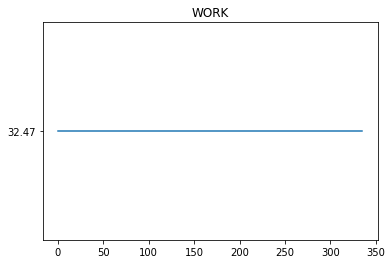

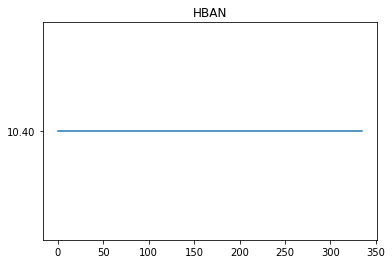

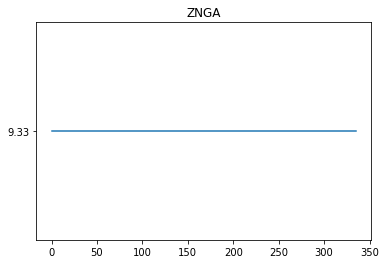

In [ ]:
dfs = []
while 1:
    # retrive current moment's data
    offset = 0
    count = 0
    og_df = getData(extract_source('https://finance.yahoo.com/most-active?count=100&offset=' + str(offset)))
    while count <1:
        offset+=100
        count+=1
        #create dataframe and add it to log of dataframes
        og_df = pd.concat([og_df,
                           getData(extract_source\
                                   ('https://finance.yahoo.com/most-active?count=100&offset='+ str(offset)))])
    dfs.append(og_df)
    og_df.apply(row_parser,axis=1)
    for ID in STOCK_TREND_DICT:
        fig, ax = plt.subplots()
        ax.plot(STOCK_TREND_DICT[ID])
        ax.set_title(ID)
        plt.show()
    time.sleep(BUFFER_TIME)